In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import shutil
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:

os.chdir('/content/drive/My Drive/project_captcha/dataset/combined')
!ls

## Morphological Closing and thresholding

In [18]:
im = cv2.imread('4_3N9N7.jpg',-1)
im.shape

(50, 200, 3)

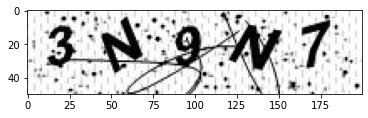

In [19]:
plt.imshow(im,cmap='gray')

(50, 200)


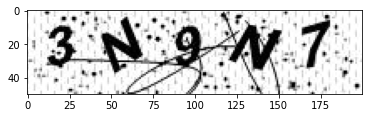

In [20]:
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')
print(im_gray.shape)

Applying morphological operations of closing and opening, kernel to be used appropriately

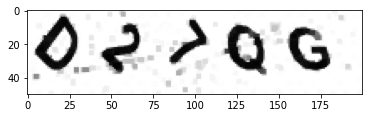

In [7]:
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(im_gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(close, cmap='gray')

In [8]:
print(set(close.flatten()))

{2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 154, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241

Applying different thresholding

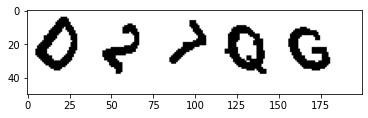

In [9]:
ret,th_otsu = cv2.threshold(close,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_otsu, cmap='gray')

In [10]:
print(set(th_otsu.flatten()))

{0, 255}


### What if we rescale 


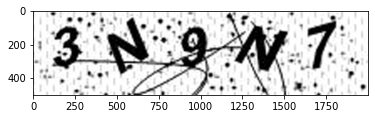

In [21]:
im_rescaled = cv2.resize(im_gray,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
plt.imshow(im_rescaled, cmap='gray')

In [22]:
im_rescaled.shape

(500, 2000)

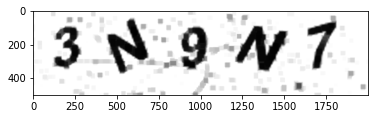

In [23]:
kernel = np.ones((23,23),np.uint8)
close_re = cv2.morphologyEx(im_rescaled, cv2.MORPH_CLOSE, kernel)
plt.imshow(close_re, cmap='gray')

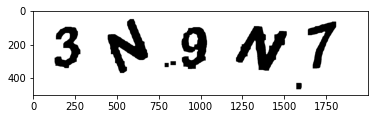

In [24]:
ret,th_otsu_re = cv2.threshold(close_re,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_otsu_re, cmap='gray')

In [25]:
print(set(th_otsu_re.flatten()))

{0, 255}


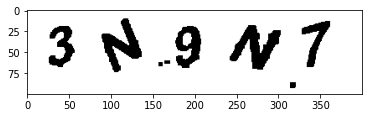

In [26]:
im_orig = cv2.resize(th_otsu_re,None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_CUBIC)
plt.imshow(im_orig, cmap='gray')

In [27]:
print(set(im_orig.flatten()))

{0, 255}


Testing with easyocr

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
result = reader.readtext(im_orig, detail=0)
print(result)

['0.? ?a G']


Processing all images

In [ ]:
files = sorted(glob.glob('*.jpg'))

for file in files:
    im =  cv2.imread(file,-1)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_rescaled = cv2.resize(im_gray,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    kernel = np.ones((23,23),np.uint8)
    close_re = cv2.morphologyEx(im_rescaled, cv2.MORPH_CLOSE, kernel)
    ret,th = cv2.threshold(close_re,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    processed = cv2.resize(th,None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_CUBIC)

    cv2.imwrite('../processed/'+file, processed)

## Deskewing letters

In [108]:
os.chdir('/content/drive/My Drive/project_captcha/dataset/processed')

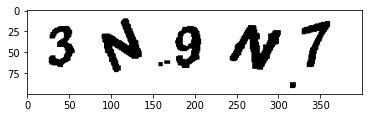

In [109]:
im = cv2.imread('4_3N9N7.jpg',0)
plt.imshow(im, cmap='gray')

In [110]:
im.shape

(100, 400)

In [111]:
print(set(im.flatten()))

{0, 1, 2, 3, 4, 5, 6, 7, 249, 250, 251, 252, 253, 254, 255}


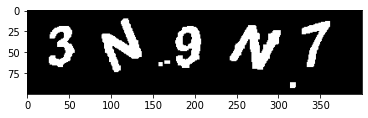

In [112]:
ret,thresh_inv = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh_inv, cmap='gray')

In [113]:
print(set(thresh_inv.flatten()))

{0, 255}


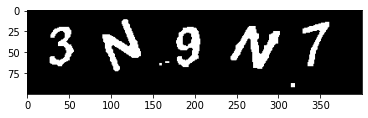

In [125]:
image_copy = thresh_inv.copy()

contours, hierarchy = cv2.findContours(image_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# print(contours)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
cv2.drawContours(image_copy, contours, -1, (0,0,255), 0)

plt.imshow(image_copy, cmap='gray')


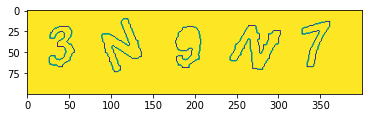

In [126]:
maxArea = 100.0
good_cnts = []
for i in range(0, len(contours)):
    area = cv2.contourArea(contours[i])
    # print(area)
    if area > maxArea:
        good_cnts.append(contours[i])

temp_img = np.ones((100,400))*255
cv2.drawContours(temp_img, good_cnts, -1, (0,0,255), 0)
plt.imshow(temp_img)


((41.0, 43.0), (30.0, 48.0), -0.0)
[[26 67]
 [26 19]
 [56 19]
 [56 67]]
((111.68938446044922, 41.41320037841797), (41.43820571899414, 54.35449981689453), -24.62356185913086)
[[104  74]
 [ 81  25]
 [119   8]
 [141  57]]
((192.0, 43.5), (30.0, 49.0), -0.0)
[[177  68]
 [177  19]
 [207  19]
 [207  68]]
((273.253662109375, 42.11707305908203), (56.991912841796875, 45.95671463012695), -65.224853515625)
[[282  77]
 [240  58]
 [264   6]
 [306  25]]
((338.1457214355469, 36.21847915649414), (60.18324661254883, 29.470264434814453), -67.98871612548828)
[[340  69]
 [313  58]
 [335   2]
 [363  13]]


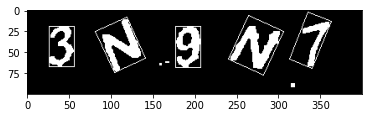

In [127]:
good_cnts = sorted(good_cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

for cnt in good_cnts:
    rect = cv2.minAreaRect(cnt)
    print(rect)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(box)
    cv2.drawContours(image_copy,[box],0,(255),1)

plt.imshow(image_copy,cmap='gray')


## Cropping and rotating each box

In [157]:
def get_mini_boxes(contour):
    rect = cv2.minAreaRect(contour)
    points = sorted(list(cv2.boxPoints(rect)), key=lambda x: x[0])
    angle = rect[2]
    index_1, index_2, index_3, index_4 = 0, 1, 2, 3
    if points[1][1] > points[0][1]:
        index_1 = 0
        index_4 = 1
    else:
        index_1 = 1
        index_4 = 0
    if points[3][1] > points[2][1]:
        index_2 = 2
        index_3 = 3
    else:
        index_2 = 3
        index_3 = 2

    box = [points[index_1], points[index_2], points[index_3], points[index_4]]
    return box, angle


In [158]:
def crop_rect(img, rect):
    
    # Rotation
    center = rect[0]
    size = rect[1]
    angle = rect[2]
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if angle < -45:
	    angle = -(90 + angle)
    else:
        angle = -angle
    # get row and col num in img
    height, width = img.shape[0], img.shape[1]
    print(height,width)
    M = cv2.getRotationMatrix2D(center, -angle, 1)
    img_rot = cv2.warpAffine(img, M, (width, height), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    print(img_rot.shape)    
    # Cropping
    
    
    img_crop = cv2.getRectSubPix(img, size, center)
    # plt.imshow(img_crop,cmap='gray')
    return img_crop, img_rot

48 30
(48, 30)
66 60
(66, 60)
49 30
(49, 30)
71 66
(71, 66)
67 50
(67, 50)


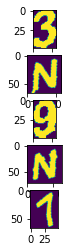

In [164]:
fig, axs = plt.subplots(5)
i=0
for cnt in good_cnts:
    box, angle = get_mini_boxes(cnt)
    box = np.int0(box)
    # print(box)

    origin_x = min(box[0][0],box[1][0],box[2][0],box[3][0])
    origin_y = min(box[0][1],box[1][1],box[2][1],box[3][1])
    # print(origin_x,origin_y)
    max_x = max(box[0][0],box[1][0],box[2][0],box[3][0])
    max_y = max(box[0][1],box[1][1],box[2][1],box[3][1])
    # print(max_x,max_y)

    width = max_x - origin_x
    height = max_y - origin_y
    centre = (width/2, height/2)
    rect = (centre,(height, width),(angle))
    img = thresh_inv[origin_y:max_y, origin_x:max_x]
    img_crop, img_rot = crop_rect(img,rect)
    axs[i].imshow(img_rot)
    i=i+1

Another method

In [ ]:
fig, axs = plt.subplots(5)
i=0
for cnt in good_cnts:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)